In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate test data

In [2]:
num_frames = 10
num_foragers = 3

np.random.seed(42)

data = {
    "x": np.random.randn(num_frames * num_foragers),
    "y": np.random.randn(num_frames * num_foragers),
    "time": np.tile(np.arange(num_frames), num_foragers),
    "forager": np.concatenate([i * np.ones(num_frames) for i in range(num_foragers)]),
}
foragersDF = pd.DataFrame(data)

# add nan values
nan_ind = [4, 9, 20]
foragersDF.loc[nan_ind, ["x", "y"]] = np.nan

# remove values for certain time points
drop_ind = [12, 6, 14]
drop_t = foragersDF["time"][drop_ind].to_list()
drop_f = foragersDF["forager"][drop_ind].to_list()
foragersDF = foragersDF.drop(drop_ind)

foragersDF

,x,y,time,forager
0,0.496714,-0.601707,0,0.0
1,-0.138264,1.852278,1,0.0
2,0.647689,-0.013497,2,0.0
3,1.523030,-1.057711,3,0.0
4,NaN,NaN,4,0.0
5,-0.234137,-1.220844,5,0.0
7,0.767435,-1.959670,7,0.0
8,-0.469474,-1.328186,8,0.0
9,NaN,NaN,9,0.0
10,-0.463418,0.738467,0,1.0


# Object creation functions
dataObject(df) must display a warning when df contains nans and/or if any timeframes are incomplete

In [3]:
from collab2.foraging.toolkit import (
    dataObject,
    rescale_to_grid,
    subset_frames_evenly_spaced,
)

foragersDF_scaled = rescale_to_grid(foragersDF, size=5)
foragersDF_scaled_subsampled = subset_frames_evenly_spaced(foragersDF_scaled, 8)

original_frames: 9
original_shape: (27, 4)
resulting_frames: 8
resulting_shape: (22, 4)
min_time 1
max_time 8


In [4]:
foragers_object = dataObject(foragersDF_scaled_subsampled)

/Users/Admin/Repositories/collab-creatures/collab2/foraging/toolkit/utils.py:36: UserWarning: Nan values in data. Specify handling of missing data using skip_incomplete_frames argument to generate_all_predictors
  warnings.warn(f"Nan values in data. Specify handling of missing data using skip_incomplete_frames argument to generate_all_predictors")
/Users/Admin/Repositories/collab-creatures/collab2/foraging/toolkit/utils.py:44: UserWarning: Incomplete frames in data. Specify handling of missing data using skip_incomplete_frames argument to generate_all_predictors
  warnings.warn(f"Incomplete frames in data. Specify handling of missing data using skip_incomplete_frames argument to generate_all_predictors")


In [5]:
foragersDF_scaled_subsampled.dropna() #still contains missing data even if no nans

,x,y,time,forager
0,3.0,2.0,1,1.0
1,3.0,5.0,2,1.0
2,3.0,3.0,3,1.0
3,5.0,1.0,4,1.0
7,4.0,1.0,7,1.0
8,2.0,1.0,8,1.0
10,2.0,3.0,1,2.0
11,2.0,3.0,2,2.0
13,1.0,2.0,4,2.0
15,2.0,2.0,5,2.0


In [6]:
foragers_object2 = dataObject(foragersDF_scaled_subsampled.dropna())

/Users/Admin/Repositories/collab-creatures/collab2/foraging/toolkit/utils.py:44: UserWarning: Incomplete frames in data. Specify handling of missing data using skip_incomplete_frames argument to generate_all_predictors
  warnings.warn(f"Incomplete frames in data. Specify handling of missing data using skip_incomplete_frames argument to generate_all_predictors")


# Local windows & helper functions

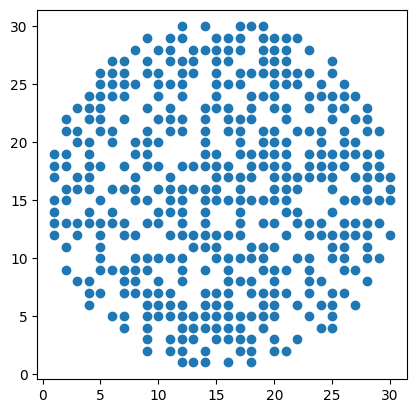

In [7]:
from collab2.foraging.toolkit import get_grid

def circular_constraint_func(x,y,R,c_x,c_y):
    return ((x-c_x)**2 + (y-c_y)**2) < R**2

grid_size = 30
grid = get_grid(grid_size=grid_size,sampling_fraction=0.5,grid_constraint=circular_constraint_func, grid_constraint_params={"c_x" : grid_size/2 + 0.5, "c_y" : grid_size/2 + 0.5 , "R" : grid_size/2})
fig, ax = plt.subplots()
ax.scatter(grid["x"],grid["y"])
ax.set_aspect('equal')


In [36]:
from collab2.foraging.toolkit import _generate_local_windows

foragersDF_scaled = rescale_to_grid(foragersDF, size=20)
foragersDF_scaled_subsampled = subset_frames_evenly_spaced(foragersDF_scaled, 8)
foragers_object = dataObject(foragersDF_scaled_subsampled)

local_windows_params = {
   "foragers" : foragers_object.foragers,
   "foragersDF" : foragers_object.foragersDF,
   "grid_size" : foragers_object.grid_size,
   "num_frames" : foragers_object.num_frames,
   "num_foragers" : foragers_object.num_foragers,
   "window_size" : 5,
   "sampling_fraction" : 1,
   "skip_incomplete_frames" : False,
   "grid_constraint" : None,
   "grid_constraint_params" : None

}
local_windows = _generate_local_windows(**local_windows_params)

original_frames: 9
original_shape: (27, 4)
resulting_frames: 8
resulting_shape: (22, 4)
min_time 1
max_time 8


/Users/Admin/Repositories/collab-creatures/collab2/foraging/toolkit/utils.py:36: UserWarning: Nan values in data. Specify handling of missing data using skip_incomplete_frames argument to generate_all_predictors
  warnings.warn(f"Nan values in data. Specify handling of missing data using skip_incomplete_frames argument to generate_all_predictors")
/Users/Admin/Repositories/collab-creatures/collab2/foraging/toolkit/utils.py:44: UserWarning: Incomplete frames in data. Specify handling of missing data using skip_incomplete_frames argument to generate_all_predictors
  warnings.warn(f"Incomplete frames in data. Specify handling of missing data using skip_incomplete_frames argument to generate_all_predictors")


In [48]:
def plot_local_windows(foragers_object, local_windows, f=0): 
    ncols = 4
    nrows = np.ceil(foragers_object.num_frames / ncols).astype(int)
    fig,ax = plt.subplots(nrows,ncols,figsize=(10,5))
    for t in range(foragers_object.num_frames):
        r = t // ncols
        c = t % ncols
        if local_windows[f][t] is not None :
            ax[r,c].scatter(local_windows[f][t]["x"],local_windows[f][t]["y"],s=0.3)
        ax[r,c].set_xlim([0,foragers_object.grid_size])
        ax[r,c].set_ylim([0,foragers_object.grid_size])
        ax[r,c].scatter(foragers_object.foragers[f].query("time == @t+1")["x"],foragers_object.foragers[f].query("time == @t+1")["y"],color='k')
        ax[r,c].set_title(f"t={t+1}")
        ax[r,c].set_aspect('equal')

    fig.tight_layout(pad=2)

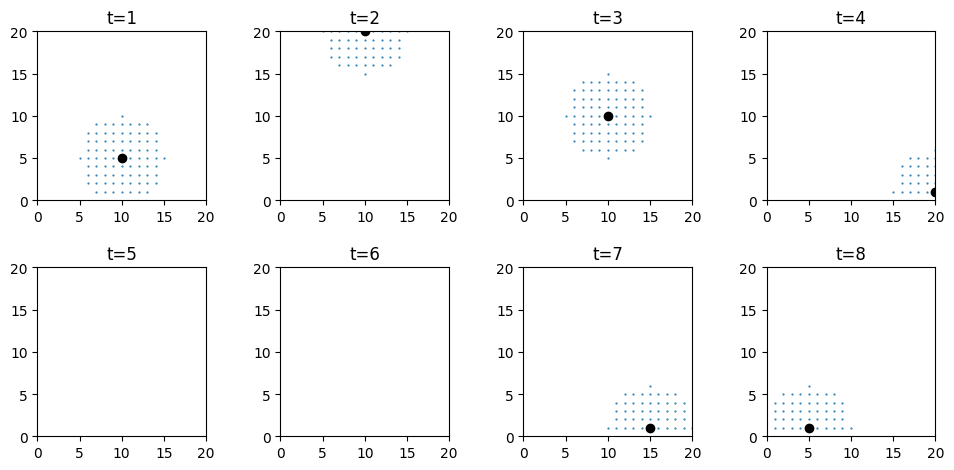

In [49]:
# check that frames with missing data have no local windows, as required
plot_local_windows(foragers_object, local_windows, f=0)